# Effects of Learning Rate (and maybe a little overfitting)

- breast cancer example
- three identical nets, different LR, side by side comparison

# Setup(s)

## Libraries setup

In [ ]:
#very common libraries, that we for sure are using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Seed setup

In [ ]:
from numpy.random import seed
myseed = 0
seed(myseed)
tf.random.set_seed(myseed)

## Data setup

In [ ]:
#libraries for this block
import sklearn.datasets
from sklearn.model_selection import StratifiedShuffleSplit

# loading data
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()
y = bcancer.target
X = pd.DataFrame(bcancer.data, columns=bcancer.feature_names)

# normalizing
X = (X - X.mean())/X.std()

## Support functions

In [ ]:
#libraries for this block
from keras.models import Sequential
from keras.layers import Dense 
from tensorflow.keras.optimizers import SGD

# a function to declare and train the network, given the learning rate
def train_net(X, y, LR,
              output_activation = 'sigmoid', 
              loss_function = 'binary_crossentropy', 
              extra_metrics = ['binary_accuracy'], 
              num_epochs = 100):
  
  #this depends on the input data
  input_shape = (X.shape[1],)

  # 1-node logistic neural network
  model = Sequential()
  model_1LN.add(Dense(1, activation=output_activation))

  #instantiating the optimizer, compiling, training
  opt = SGD(learning_rate=LR)
  model_1LN.compile(optimizer=opt, loss=loss_function, metrics=extra_metrics)
  history = model_1LN.fit(X, y, epochs=num_epochs, validation_split=0.2, verbose=0)

  return(history)

#a function to plot loss or metrics
def plot_history(h, title, target='loss'):
    plt.rcParams["figure.figsize"]=5,5
    plt.plot(h.history[target], label = "Train " + target)
    plt.plot(h.history['val_'+target], label = "Validation " + target)
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show() 


# Compare various LR

In [ ]:
#considered values
LR_small  = 0.00001
LR_medium = 0.01
LR_large  = 10

#let's train the net
h_small  = train_net(X=X, y=y, LR=LR_small)
h_medium = train_net(X=X, y=y, LR=LR_medium)
h_large  = train_net(X=X, y=y, LR=LR_large)

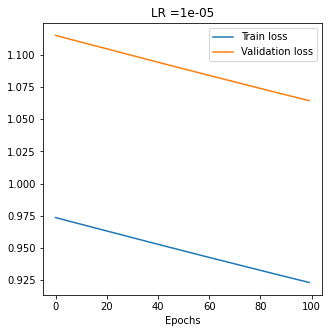

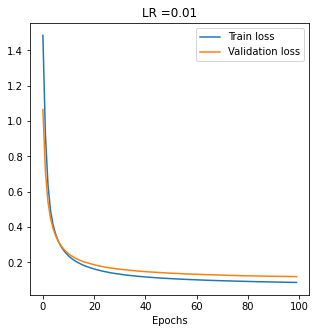

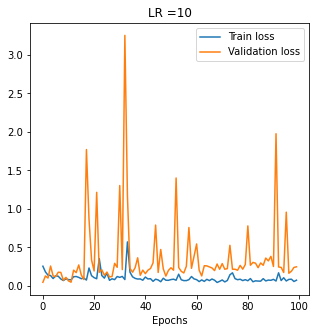

In [ ]:
plot_history(h_small, title = 'LR =' + str(LR_small))
plot_history(h_medium, title = 'LR =' + str(LR_medium))
plot_history(h_large, title = 'LR =' + str(LR_large))

## Side by side plot for better comparison

In [ ]:
# building a single dataframe

#small LR
hist = pd.DataFrame({
    'epoch' : [i for i in range(100)],
    'variable' : 'loss',
    'value' : h_small.history['loss'], 
    'LR' : LR_small  
    })
hist = pd.concat([hist, pd.DataFrame({
    'epoch' : [i for i in range(100)],
    'variable' : 'val_loss',
    'value' : h_small.history['val_loss'], 
    'LR' : LR_small  
    })], ignore_index=True)

#medium LR
hist = pd.concat([hist, pd.DataFrame({
    'epoch' : [i for i in range(100)],
    'variable' : 'loss',
    'value' : h_medium.history['loss'], 
    'LR' : LR_medium  
    })], ignore_index=True)
hist = pd.concat([hist, pd.DataFrame({
    'epoch' : [i for i in range(100)],
    'variable' : 'val_loss',
    'value' : h_medium.history['val_loss'], 
    'LR' : LR_medium 
    })], ignore_index=True)

#large LR
hist = pd.concat([hist, pd.DataFrame({
    'epoch' : [i for i in range(100)],
    'variable' : 'loss',
    'value' : h_large.history['loss'], 
    'LR' : LR_large  
    })], ignore_index=True)
hist = pd.concat([hist, pd.DataFrame({
    'epoch' : [i for i in range(100)],
    'variable' : 'val_loss',
    'value' : h_large.history['val_loss'], 
    'LR' : LR_large 
    })], ignore_index=True)

A little check on our data

In [ ]:
hist.head

<bound method NDFrame.head of      epoch  variable     value        LR
0        0      loss  0.973659   0.00001
1        1      loss  0.973130   0.00001
2        2      loss  0.972606   0.00001
3        3      loss  0.972082   0.00001
4        4      loss  0.971534   0.00001
..     ...       ...       ...       ...
595     95  val_loss  0.956400  10.00000
596     96  val_loss  0.163232  10.00000
597     97  val_loss  0.188956  10.00000
598     98  val_loss  0.238838  10.00000
599     99  val_loss  0.246439  10.00000

[600 rows x 4 columns]>

The actual plot

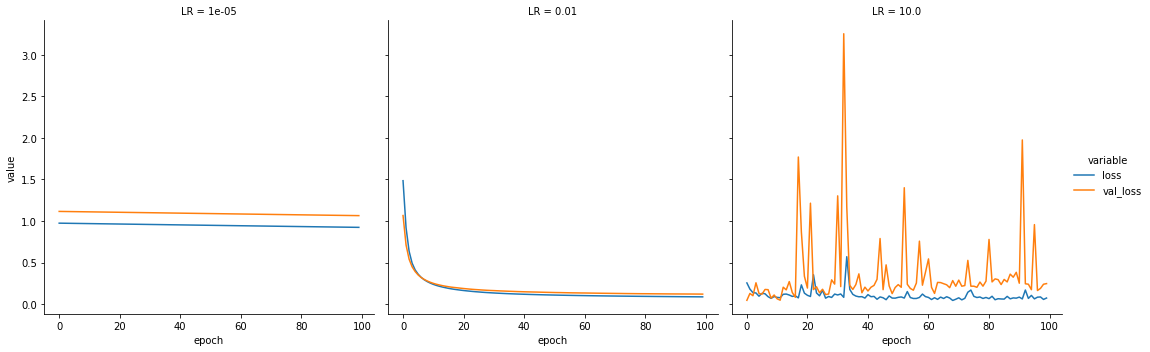

In [ ]:
import seaborn as sns

#a three-paneled plot
g = sns.FacetGrid(data=hist, col='LR', hue='variable', col_wrap=3, height=5)
g.map(sns.lineplot, 'epoch', 'value')
g.add_legend()

# Further readings: automatic LR tuning

No algorithm can optimize LR for every use-case. It is however possible to have a systematic approach in the exploration of LR values. A very good starting point is pyimagesearch's cycle of posts on the topic, and in particular [Part #3: Keras Learning Rate Finder](https://pyimagesearch.com/2019/08/05/keras-learning-rate-finder/)